In [1]:
# import relevant libraries here 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import acf

### Understanding the components of Time Series Data set

First, you'll simulate a time series dataset. This will help us better understand the components of a time series and the concepts underlying time series analysis and grok, so to speak, the steps that go into modeling time series using a generative modeling approach. In other words, given the time series plotted below, our goal is the build a data set that is most similar to the one below.

<img src="images/simulated_dataset.png" alt="drawing" style="width:800px;"/>

Use your understanding of how seasonality trend and noise interact in a time series to generate data set similar to the one above.
The information that you need to reproduce this dataset is provided below:

* The data contains 200 months worth of data

* The trend is an exponential function: 

$$y = (1.5^{(\frac{\sqrt(x)}{2})}) $$

* The seasonality in this dataset is quarterly (frequency of 4 months)
and is a sine curve with an amplitude of 1.2

* The noise is Gaussian with a mean of $\mu=0$ and $\sigma=1$  

1. Compute and plot each of the components of your time series independently.

* Plot your dta to verify your solutiojn. Your plots should look like the following:

<img src="images/three_plots.png" alt="drawing" style="width:500px;"/>

2. Generate the time series by combining the three components. 

Important: use the following seed so that graph matches the one above exactly. 

```
np.random.seed(42)
```

In [2]:
# write  your code for simulating the trend


In [7]:
# plot your trend 


In [5]:
# write  your code for simulating the seasonality


In [8]:
# plot your seasonality 


In [9]:
# write  your code for simulating the noise 


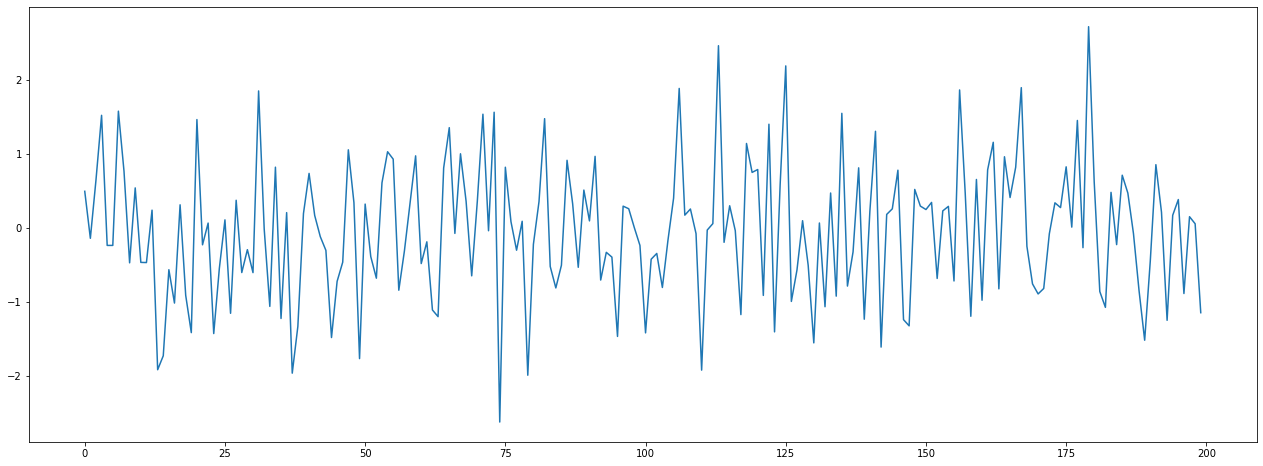

In [8]:
# plot your random noise


* Compute and plot your combined signal. The resulting graph should look (approximately) like the following.
<img src="images/final_timeseries.png" alt="drawing" width="600px"/>



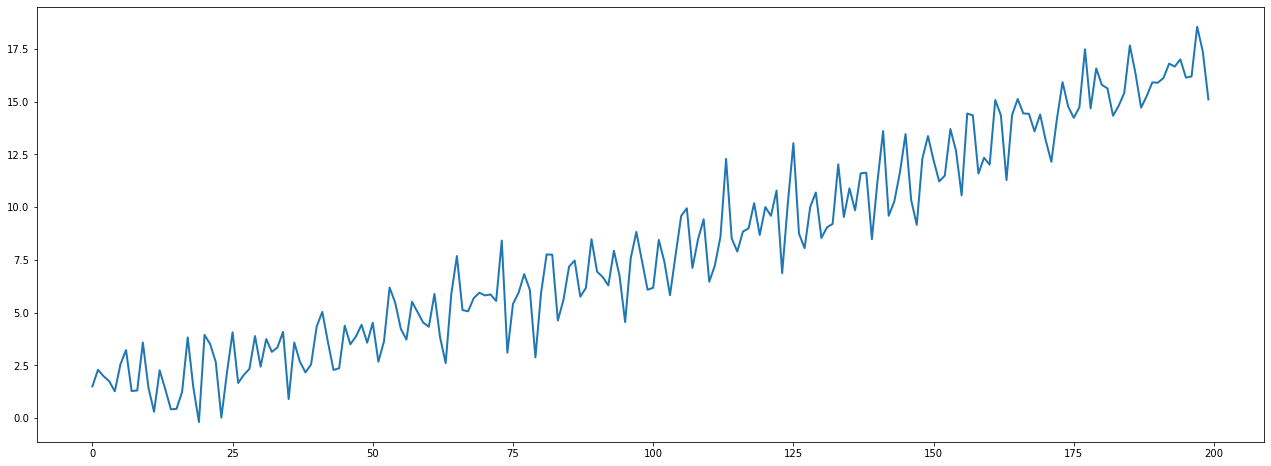

In [9]:
# Write you code here


* While the example above focused on a single sine wave with an amplitude of  1.2 and a frequency of 4 months. Real-time series often have other "embedded" seasonality signals. for instance, in addition to a quarterly seasonality, the data may contain a less robust monthly sign 


* A weaker monthly signal means that:
    1. The signal has a weaker (smaller amplitude). Let's assume the amplitude here is 0.3
    2. The signal's frequency is one month

* Plot the second harmonic based on the information above. Include the first harmonic signal as a reference. Your plot should look like the following.

<img src="images/harmonic_example.png" alt="drawing" style="width:800px;"/>

* Do not forget to label the lines

In [10]:
#### Write your code here


Plot the full seasonality, which includes the first and the second harmonics. Your plot should look like the following.

<img src="images/combined_sines.png" alt="drawing" style="width:900px;"/>

In [12]:
## Sum the quarterly and monthly trends here


In [11]:
## Plot the summed trends here


2. Generate the new time series, which includes the trend, both signal, and the stochastic noise. Your final results should look like the following

<img src="images/signal_with_monthly.png" alt="drawing" style="width:800px;"/>




In [12]:
# Write you code here


### Question 2: time Series Modeling of Passenger Count for Internationals Departing from LAX

Initially, the approach used here will be very similar to that used above. We will show that not all that looks seasonal can be easily fitted but can be forecasted using triple exponential smoothing instead. 


We will be using a dataset reporting the Los Angeles International Airport Passenger Traffic By Terminal. The data is in the file `data/LAX_final.csv`  and is formatted as a CSV (comma-separated values). The dataset contains multiple fields, but we are only interested in modeling the international departures for LAX between 2009 and 2017. 

Load the data as a pandas DataFrame and used `head()` to make sure the data was read correctly. 

Name you `DataFrame`  as `lax`


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

In [13]:
# Write you code here


We are only interested in values associated with international departures. Write an expression to retain only lines where "Arrival_Departure" is equal to "Departure" and "Domestic_International" is equivalent to "International."
 
We are also only interested in the columns `ReportPeriod` (i.e., the period covered) and the `Passenger_Count`, the number of passengers reported during that period. 
Create a new  `DataFrame`  (`Lax_int_dep`) which contains only these two columns and only international departures. 






In [14]:
# Write you code here


Compute the total number of passengers (`Passenger_Count`) per month. 
Call your new DataFrame `lax_totals`. Use the shape attribute to make sure that your resulting DataFrame matches the expected results --  recall that the data have reported values for January 2006 through January 2019.


In [15]:
# Write you code here


Recall that changing the index of the time series dataset simplifies the analysis.  Change the type of your index DataTime Index. Set the frequency of your observations to month start (`MS`).

The reporting reported includes the financial crisis of 2007-2009 https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008. 

According to news reports, travel in 2009 was ["ravaged"](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/)

Plot the data and see for yourself that the number right before 2009 are significantly lower than during the 2006-2008 period. Your plot should look like the following.


<img src="images/lax_complete.png" alt="drawing" style="width:800px;"/>


Hint: If your data does not look like the following, then check that your DataFrame `index`  **makes sense**


In [16]:
# Write your code here


It would be reasonable to remove data before the 2009 financial crisis so that the model is not affected by this `rare` anomaly. Build a new `DataFrame` and call it `lax_totals_post_08`. Use `shape` to make sure the data contains the expected number of entries. It should contain 12 entries for each of the years 2009 through 2018. Plus January 2019.

In [17]:
# Write your code here


Plot the data to make sure the data does not contain the dip associated with 2008.

Your graph should look like the following:


<img src="images/lax_totals_post_08.png" alt="drawing" style="width:800px;"/>


In [18]:
# Write your code here



* The dataset exhibits clear trends and seasonality. We will tackle the modeling of the trend prior to "attempting" to model the seasonality.

* Find the best fitting trend line and use it to detrend the data. You can achieve this by using the same strategy as that covered in class. Specifically,  you need to approximate the data using a power function $y = a x^b$, where are $a$ and $b$ are the constants you need to find.
  * use the `curve_fit` from the scipy.optimize module  to find the curve that best matches `lax_totals_post_08`
  

* Plot your best fitting trend as well as your data. Your graph should look like the following.


<img src="images/trend.png" alt="drawing" style="width:900px;"/>


In [19]:
# Write your code here



* In what follows we are going to "try" to identify the seasonality in the data. The approach we will use is similar to that followed in class and above.

* Detrend your data; i.e., Remove the trend so that seasonality is easier to observe. call the detrended data lax_totals_post_08_detrd

* Plot your data to make sure the data is detrended. Your graph should look like the following
  * Plot a horizontal line at y=0 to highlight the seasonality
    
    
<img src="images/detrended.png" alt="drawing" style="width:800px;"/>



In [20]:
# Write you code here


* Rather manually and iteratively finding all the harmonics in the signal, we will use the code below, which fits a signal using a user defined `n_harm` number of harmonincs. For instance, the fitted signal using 1, 3, 5, 10 harmonics is giving below.

<img src="images/harmonics.png" alt="drawing" style="width:1000px;"/>

* I computed the graph above using code I obtained from the following gist:
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [27]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict=0, n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

While using a large number of harmonics improves the fits but leads to a very poor forecasting power -- this is referred to as overfitting. We will cover overfitting in the next few weeks.

We suspect that perhaps the data is not stationary.  In the context of time series analysis, a non-stationary time series refers to a time series where the deterministic component of the mean (the trend and/or seasonality) changes over time.

Some examples of non-stationary time series with a time-varying mean include:

Time series with a changing trend - the underlying trend increases or decreases over time.
Time series with changing seasonality - the seasonal pattern or amplitude changes over time.
Time series with both changing trend and seasonality.

While we haven't covered rigorous methods to test non-stationarity, an easy, albeit non-rigorous method to quickly test this, is to compute the mean and variance of the data for the first half and the second half of the data.

In [6]:
print(lax_totals_post_08_orig_detrd[0:62].mean())
print(lax_totals_post_08_orig_detrd[62:].mean())

The means are largely different across the first half and the second half. This means that the variability across both subsets don't have the same parameters, indicating that the data is non-stationary, i.e. not exhibiting the same behavior all over. Recall that we said that non-stationary data is difficult to model and forecast using line-fitting. Modeling this date will require fitting two models that cover the different behaviors observed. This makes sense since one model can accommodate the different distributions contained across different time subsets.


### Bonus 5 points towards the total grade
Instead of modeling the data using a line, you could use triple exponential smoothing (i.e., exponential smoothing with trend and seasonality added). This method, which was originally part of this assignment, was removed and will be covered in class instead.